Actual Solution      (x, y, z): (1.692, 1.462, 2.769)
Gauss-Seidel final approx: (1.692, 1.462, 2.769)
Jacobi final approx:      (1.693, 1.462, 2.770)


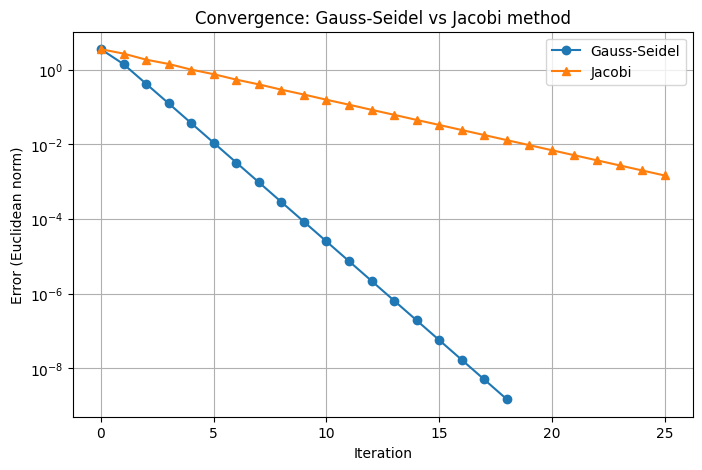

In [35]:
# Graph error at each iteration for Gauss-Seidel vs Jacobi method
# We'll first define the solvers, then a function to plot their convergence.

import numpy as np
import matplotlib.pyplot as plt

# ==== Solver Functions ====

# Classic Gauss-Seidel solution for a 3x3 system. Stand-alone, returns the variable sequence.
def gauss_seidel_3vars(a, b, c, d, iters=25, tol=1e-8):
    """Solve 3x3 system with Gauss-Seidel method.
    
    Args:
        a, b, c, d: coefficient arrays/lists for system, each length 3.
        iters: maximum number of iterations.
        tol: error tolerance for early stopping.
        
    Returns:
        xs, ys, zs: lists of variable values for each iteration.
    """
    x = y = z = 0.0
    xs, ys, zs = [x], [y], [z]
    for it in range(iters):
        x_new = (d[0] - b[0]*y - c[0]*z) / a[0]
        y_new = (d[1] - a[1]*x_new - c[1]*z) / b[1]
        z_new = (d[2] - a[2]*x_new - b[2]*y_new) / c[2]
        xs.append(x_new)
        ys.append(y_new)
        zs.append(z_new)
        # Early stopping if converged
        if np.linalg.norm([x_new-x, y_new-y, z_new-z]) < tol:
            break
        x, y, z = x_new, y_new, z_new
    return xs, ys, zs

# Classic Jacobi solution for a 3x3 system. Stand-alone, returns the variable sequence.
def jacobi_3vars(a, b, c, d, iters=25, tol=1e-8):
    """Solve 3x3 system with Jacobi method.
    
    Args and Returns: as in gauss_seidel_3vars.
    """
    x = y = z = 0.0
    xs, ys, zs = [x], [y], [z]
    for it in range(iters):
        x_new = (d[0] - b[0]*y - c[0]*z) / a[0]
        y_new = (d[1] - a[1]*x - c[1]*z) / b[1]
        z_new = (d[2] - a[2]*x - b[2]*y) / c[2]
        xs.append(x_new)
        ys.append(y_new)
        zs.append(z_new)
        # Early stopping if converged
        if np.linalg.norm([x_new-x, y_new-y, z_new-z]) < tol:
            break
        x, y, z = x_new, y_new, z_new
    return xs, ys, zs

def solution_errors(xs, ys, zs, actual_sol):
    """Compute the error (Euclidean norm from actual solution) at each iteration."""
    errors = []
    for x, y, z in zip(xs, ys, zs):
        err = np.linalg.norm([x-actual_sol[0], y-actual_sol[1], z-actual_sol[2]])
        errors.append(err)
    return errors

# ==== Example System Setup ====
# Use a diagonally dominant system for fast and assured convergence
# Example: x + y + z = 6; 2x + 3y + 7z = 26; 2x + 5y + 2z = 17 (coefficients swapped to diagonally dominant below)
A = [4, 5, 6]
B = [1, 6, 1]
C = [1, 1, 7]
D = [11, 20, 31]

# Compute actual solution (ground truth, using numpy's linear solver)
coeff_matrix = np.array([A, B, C]).T  # Shape (3, 3)
d_vector = np.array(D)
actual_sol = np.linalg.solve(coeff_matrix, d_vector)

print(f"Actual Solution      (x, y, z): ({actual_sol[0]:.3f}, {actual_sol[1]:.3f}, {actual_sol[2]:.3f})")

# ==== Solver Applications ====

iters = 25  # iterations for plotting

# Gauss-Seidel (run full sequence, get history)
gs_xs, gs_ys, gs_zs = gauss_seidel_3vars(A, B, C, D, iters=iters)
gs_errs = solution_errors(gs_xs, gs_ys, gs_zs, actual_sol)
print(f"Gauss-Seidel final approx: ({gs_xs[-1]:.3f}, {gs_ys[-1]:.3f}, {gs_zs[-1]:.3f})")

# Jacobi (run full sequence, get history)
jacobi_xs, jacobi_ys, jacobi_zs = jacobi_3vars(A, B, C, D, iters=iters)
jacobi_errs = solution_errors(jacobi_xs, jacobi_ys, jacobi_zs, actual_sol)
print(f"Jacobi final approx:      ({jacobi_xs[-1]:.3f}, {jacobi_ys[-1]:.3f}, {jacobi_zs[-1]:.3f})")

# ==== Plotting Convergence Errors ====

plt.figure(figsize=(8,5))
plt.semilogy(range(len(gs_errs)), gs_errs, label='Gauss-Seidel', marker='o')
plt.semilogy(range(len(jacobi_errs)), jacobi_errs, label='Jacobi', marker='^')
plt.xlabel('Iteration')
plt.ylabel('Error (Euclidean norm)')
plt.title('Convergence: Gauss-Seidel vs Jacobi method')
plt.legend()
plt.grid(True, which='both')

# Additional valuable comment:
# From the graph, you can compare the convergence rates of the two iterative methods.
# Typically, Gauss-Seidel converges faster if the system is diagonally dominant.

plt.show()
